<a href="https://colab.research.google.com/github/alwalid54321/Face-Detection-Model/blob/main/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python-headless matplotlib kaggle

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
IMG_WIDTH, IMG_HEIGHT = 128, 128
BATCH_SIZE = 32
EPOCHS = 50


In [ ]:
from google.colab import files
files.upload()  # Upload 'kaggle.json' from your local machine

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alwalid54321","key":"1cec073eddcdfd1cd9bd35a3dab9993f"}'}

In [ ]:
import os
# Set environment variable for the Kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Ensure correct permissions for the file
!chmod 600 /content/kaggle.json

In [ ]:
!kaggle datasets download -d fareselmenshawii/face-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset
License(s): CC0-1.0
100% 4.42G/4.43G [01:16<00:00, 91.1MB/s]
100% 4.43G/4.43G [01:16<00:00, 62.6MB/s]


In [ ]:

with zipfile.ZipFile('face-detection-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/face-detection-dataset')

In [ ]:
dataset_dir = '/content/face-detection-dataset'
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        print(os.path.join(root, file))


Streaming output truncated to the last 5000 lines.
/content/face-detection-dataset/labels/train/5ef9c4fd692c2514.txt
/content/face-detection-dataset/labels/train/f3b2a68a84d3182c.txt
/content/face-detection-dataset/labels/train/0cfb8a97e5949f48.txt
/content/face-detection-dataset/labels/train/9d2f166f00fb19cc.txt
/content/face-detection-dataset/labels/train/cc59392db84e7836.txt
/content/face-detection-dataset/labels/train/b8f5f362ca537774.txt
/content/face-detection-dataset/labels/train/ec1d7f2b02ce6efe.txt
/content/face-detection-dataset/labels/train/c1eacdea46fa25a4.txt
/content/face-detection-dataset/labels/train/e562d4b890009124.txt
/content/face-detection-dataset/labels/train/35e2e6fb1e5a9265.txt
/content/face-detection-dataset/labels/train/7b211d352c8cb4f2.txt
/content/face-detection-dataset/labels/train/6f95b51ca2c34ae2.txt
/content/face-detection-dataset/labels/train/20398d4f2db43e10.txt
/content/face-detection-dataset/labels/train/5152a2932f9b8b68.txt
/content/face-detection-d

In [ ]:
import os

dataset_dir = '/content/face-detection-dataset'
for root, dirs, files in os.walk(dataset_dir):
    print(f"Root: {root}, Dirs: {dirs}, Files: {files}")

Root: /content/face-detection-dataset, Dirs: ['labels2', 'images', 'labels'], Files: []
Root: /content/face-detection-dataset/labels2, Dirs: [], Files: ['0a5fbc2c83104330.txt', '4e95b8812b7d2b38.txt', '1e63efeb9094cb0d.txt', '5ce7f0f0f4be9b66.txt', '66a2d15dd65685b4.txt', '71381e530f53e424.txt', 'fd71b56ac13167c0.txt', '949d53920699579a.txt', '67be61df4b28aac3.txt', '350790a5e3eba9e7.txt', 'e644622bdafc6970.txt', 'a60ef866beadf5b7.txt', '35cb901517499e0a.txt', '1e36cd434fd325cc.txt', '86b45efde9d79fea.txt', '04cc4fdf9aad5217.txt', '51aab61c7a776e3c.txt', '647c44ab92484ed2.txt', '47d169038b219888.txt', '74e801cea1320178.txt', 'efed94e2df737fa4.txt', 'e20b79b819fa2a01.txt', 'a550fec0b8a5cbcd.txt', '136a1e057280127b.txt', '6c1ee0a2b8c1567f.txt', 'b5a8095b0bb32898.txt', 'a07e92e729072531.txt', '232b5831f8763197.txt', 'ad9a0b2e87978cd1.txt', 'de8e22a4a5348b26.txt', '88e89ce3aaf95344.txt', 'c871b54e2db93cf0.txt', 'a13aae8074a9ad4b.txt', '513fa3eb09a9b448.txt', '89aee9d82eb50438.txt', 'de439b

In [ ]:
import os

def fix_file_extensions(directory, extension=".jpg"):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if '.' not in file:  # Check if the file has no extension
                new_file_path = file_path + extension
                os.rename(file_path, new_file_path)
                print(f"Renamed: {file_path} -> {new_file_path}")

# Fix the file extensions for both train and val directories
train_dir = '/content/face-detection-dataset/images/train'
val_dir = '/content/face-detection-dataset/images/val'

fix_file_extensions(train_dir, ".jpg")
fix_file_extensions(val_dir, ".jpg")


In [ ]:
for root, dirs, files in os.walk('/content/face-detection-dataset/images'):
    for file in files:
        print(f"File: {file}")


Streaming output truncated to the last 5000 lines.
File: 8f685e2977ab5a55.jpg
File: 991f4dcd7ec4a89c.jpg
File: df642530b6b8ce77.jpg
File: 017a9b3e82da2196.jpg
File: 274727dc30012a92.jpg
File: ffa6b8e0d6de0af2.jpg
File: 7b542a3c561f4288.jpg
File: 985e3c6dd9695433.jpg
File: 1f3de96f61dbe121.jpg
File: 07f75a750512ef2f.jpg
File: 888b50fc7a0eab55.jpg
File: 6fcbde5865f79bd4.jpg
File: 5994839fb1b1bc3a.jpg
File: 00228d70340dbb12.jpg
File: a54784c7147c6782.jpg
File: 99136835eb81e5e1.jpg
File: daa6a4fb2da9f659.jpg
File: b98c8ee249253dab.jpg
File: 29df83e8ec50061c.jpg
File: 6ba322610fab0d0b.jpg
File: 24b8b482e32ce060.jpg
File: e3ddb73a7e4fd19a.jpg
File: 3ba4cf7c5476fa92.jpg
File: 6bb5c7080ede29db.jpg
File: 6bac0f86387681ba.jpg
File: 948c9e7b740b86b1.jpg
File: d10e308e262889f7.jpg
File: 26fbeab960f41b18.jpg
File: 01db8898e1817d9e.jpg
File: 7e3092c06bdf13b6.jpg
File: fb123a8d2d1f80e3.jpg
File: 7e2b01477e9305bf.jpg
File: 0a8f2b8a86f1ec7c.jpg
File: a4147dcdbf44f7b9.jpg
File: 9dff5637d1f8d38f.jpg
File

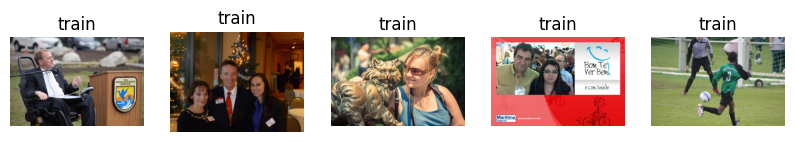

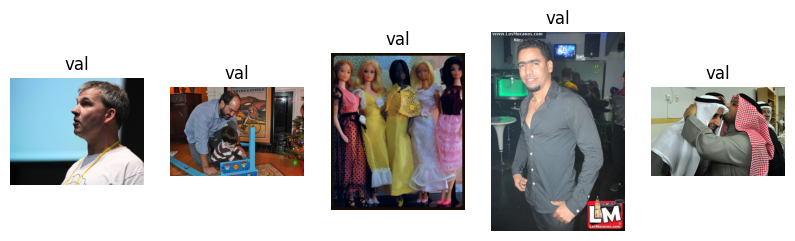

In [ ]:
load_and_display_samples('/content/face-detection-dataset/images')


In [ ]:
def create_model():
    base_model = tf.keras.applications.MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
def train_model(model, train_generator, validation_generator):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        patience=10,
        restore_best_weights=True
    )
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-4 * 0.9**epoch
    )

    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // BATCH_SIZE,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history


In [ ]:
def save_model(model, model_path):
    model.save(model_path)

def load_model(model_path):
    return models.load_model(model_path)


In [ ]:
def detect_face(model, image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (IMG_WIDTH, IMG_HEIGHT))
    img_normalized = img_resized / 255.0
    img_batch = np.expand_dims(img_normalized, axis=0)

    prediction = model.predict(img_batch)

    label = "Face" if prediction[0][0] > 0.5 else "No Face"
    color = (0, 255, 0) if label == "Face" else (0, 0, 255)

    cv2.putText(img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()


In [1]:
# def main():
#     data_dir = '/content/face-detection-dataset'  # Update this path
#     model_path = 'face_detection_model.h5'

#     if not os.path.exists(model_path):
#         print("Training new model...")
#         train_generator, validation_generator = load_and_preprocess_data(data_dir)
#         model = create_model()
#         history = train_model(model, train_generator, validation_generator)
#         save_model(model, model_path)
#         plot_training_history(history)
#     else:
#         print("Loading existing model...")
#         model = load_model(model_path)

#     # Test the model on a new image
#     test_image_path = '/content/download (1).jpg'  # Update this path
#     detect_face(model, test_image_path)

# if __name__ == "__main__":
#     main()
